# Localization

belief = probability  
sense/measurments = product followed by normalizations  / bayes rule   
move = convolution / total probability

In [11]:
#Given the list motions=[1,1] which means the robot 
#moves right and then right again, compute the posterior 
#distribution if the robot first senses red, then moves 
#right one, then senses green, then moves right again, 
#starting with a uniform prior distribution.

p = [0.2, 0.2, 0.2, 0.2, 0.2]
world = ['green', 'red', 'red', 'green', 'green']
measurements = ['red', 'green']
motions = [1,1]
pHit = 0.6
pMiss = 0.2
pExact = 0.8
pOvershoot = 0.1
pUndershoot = 0.1

# based of measurments or observations of robot
def sense(p, Z):
    """
        p = starting p values - list 
        Z = measurement - string
    """    
    # store the new p values
    q=[]
    
    # updates the values of p with hit or miss values
    # hit:  .2 * .6
    # miss: .2 * .2
    for i in range(len(p)):
        # returns 1 or 0
        hit = (Z == world[i])
       
        # if hit is true it cancels the right half of statement
        # if hit is false is cancles out the left half
        q.append(p[i] * (hit * pHit + (1-hit) * pMiss))

    # get the normalizing sum
    s = sum(q)
    
    # normalize q values    
    for i in range(len(q)):
        q[i] = q[i] / s
    
    return q

# robot movement 
def move(p, U):
    """
        p is starting p values
        U is movement number
    """
    q = []
    
    for i in range(len(p)):        
        ## this is a modulos trick to shift index based on movement
        s = pExact * p[(i-U) % len(p)]
       
    # baked in overshoot and undershoot probabilities
        s = s + pOvershoot * p[(i-U-1) % len(p)]
        s = s + pUndershoot * p[(i-U+1) % len(p)]
        q.append(s)
    
   
    return q

# run code for any number of measurments
for m in range(len(measurements)):
    # change probabliities based on measurments of robot
    p = sense(p, measurements[m])
    # change probablities based on movements of robot
    p = move(p, motions[m])


print(p) 

[0.21157894736842103, 0.1515789473684211, 0.08105263157894739, 0.16842105263157897, 0.3873684210526316]


In [16]:
# kalman filter - adding two gaussian distributions and moving them

def update(mean1, var1, mean2, var2):
    new_mean = ((var2 * mean1 ) + (var1 * mean2)) / (var1 + var2)
    new_var = (1 / ((1/var1) + (1/var2)))
    return [new_mean, new_var]

def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    return [new_mean, new_var]


print(update(10.,8.,13., 2.))

print(predict(10., 4., 12., 4.))

measurements = [5., 6., 7., 9., 10.]
motion = [1., 1., 2., 1., 1.]
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

for n in range(len(measurements)):
    [mu, sig] = update(mu, sig, measurements[n], measurement_sig)
    print('update ' , [mu, sig])
    [mu, sig] = predict(mu, sig, motion[n], motion_sig)
    print('predict ' , [mu, sig])
    


[12.4, 1.6]
[22.0, 8.0]
update  [4.998000799680128, 3.9984006397441023]
predict  [5.998000799680128, 5.998400639744102]
update  [5.999200191953932, 2.399744061425258]
predict  [6.999200191953932, 4.399744061425258]
update  [6.999619127420922, 2.0951800575117594]
predict  [8.999619127420921, 4.09518005751176]
update  [8.999811802788143, 2.0235152416216957]
predict  [9.999811802788143, 4.023515241621696]
update  [9.999906177177365, 2.0058615808441944]
predict  [10.999906177177365, 4.005861580844194]


# Quantifying State

In [3]:
# Constant velocity case

# initial variables
x = 0
velocity = 50
initial_state = [x, velocity]

# predicted state (after three seconds)
# this state has a new value for x, but the same velocity as in the initial state
dt = 3
new_x = x + velocity*dt
predicted_state = [new_x, velocity]  # predicted_state = [150, 50]
print(predicted_state)

[150, 50]


In [6]:
# Constant acceleration, changing velocity

# initial variables
x = 0
velocity = 50
acc = -20

initial_state = [x, velocity, acc]

# predicted state after three seconds have elapsed
# this state has a new value for x, and a new value for velocity (but the acceleration stays the same)
dt = 3

displacement_area_rect = velocity*dt
displacement_area_tri = 0.5*acc*dt**2

new_x = x + displacement_area_rect + displacement_area_tri
new_vel = velocity + acc*dt

predicted_state = [new_x, new_vel, acc]  # predicted_state = [60, -10, -20]
print(predicted_state)

[60.0, -10, -20]


# Car playground 1

This notebook provides some initial variables and creates one car object, but, here, you are encouraged to play around with the car movement code!

This playground is especially useful if you **modify the car.py file** and want to test out some new car property or function!

So, your only tasks for this notebook are to use it as your own personal testing ground. Some ideas:
1. Create multiple cars, with different initial states
    - And visualize them using `display_world()`
2. Add a function in car.py (by navigating back to it clicking the orange Jupyter icon), and then call that function, here!
3. Add a new initial variable to __init__ in car.py and use it!

In [12]:
import numpy as np
import car

%matplotlib inline

# Auto-reload function so that this notebook keeps up with 
# changes in the class file 
%load_ext autoreload
%autoreload 2

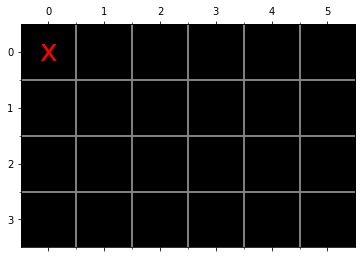

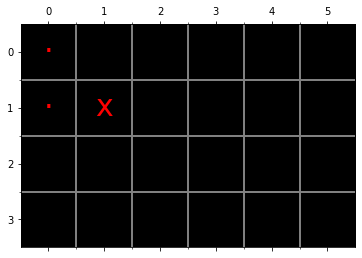

In [14]:
# Create a 2D world of 0's
height = 4
width = 6
world = np.zeros((height, width))

# Define the initial car state
initial_position = [0, 0] # [y, x] (top-left corner)
velocity = [0, 1] # [vy, vx] (moving to the right)

# Create a car with initial params
carla = car.Car(initial_position, velocity, world)
carla.display_world()

carla.turn_right()
carla.move()
carla.turn_left()
carla.move()
carla.display_world()